In [3]:
#load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix

In [4]:
import pandas as pd
# defining file path 
path="../../Data/cancer/cancer.csv"

#define names
names = ["sample_id", "patient_cohort", "sample_origin", "age", "sex", "diagnosis","stage", "benign_sample_diagnosis", "plasma_CA19_9", "creatinine","LYVE1", "REG1B", "TFF1", "REG1A"]
# Load data in pandas dataframe
cancer_data = pd.read_csv(file_path, names=names, skiprows=1)


NameError: name 'file_path' is not defined

In [ ]:
# take a peak at the dataset
print(cancer_data.head(20))



   sample_id patient_cohort sample_origin  age sex  diagnosis stage  \
0         S1        Cohort1          BPTB   33   F          1   NaN   
1        S10        Cohort1          BPTB   81   F          1   NaN   
2       S100        Cohort2          BPTB   51   M          1   NaN   
3       S101        Cohort2          BPTB   61   M          1   NaN   
4       S102        Cohort2          BPTB   62   M          1   NaN   
5       S103        Cohort2          BPTB   53   M          1   NaN   
6       S104        Cohort2          BPTB   70   M          1   NaN   
7       S105        Cohort2          BPTB   58   F          1   NaN   
8       S106        Cohort2          BPTB   59   F          1   NaN   
9       S107        Cohort2          BPTB   56   F          1   NaN   
10      S108        Cohort2          BPTB   77   F          1   NaN   
11      S109        Cohort2          BPTB   71   M          1   NaN   
12       S11        Cohort1          BPTB   49   F          1   NaN   
13    

In [ ]:
#show data shape
print(cancer_data.shape)

(591, 14)


In [ ]:
# obtain count, mean, min, max, and percentiles 
print(cancer_data.describe())

        sample_id patient_cohort sample_origin  age  sex diagnosis stage  \
count         591            591           591  591  591       591   200   
unique        591              3             5   64    3         4     9   
top     sample_id        Cohort1          BPTB   68    F         2   III   
freq            1            332           409   21  299       208    76   

       benign_sample_diagnosis plasma_CA19_9 creatinine       LYVE1 REG1B  \
count                      209           351        591         591   591   
unique                      53           267        199         536   581   
top               Pancreatitis            11    0.57681  0.00081432  2.45   
freq                        41             8         11           5     2   

              TFF1 REG1A  
count          591   307  
unique         561   299  
top     0.02470104     0  
freq             4     7  


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Check for missing values
print("\nMissing values per column:\n")
print(cancer_data.isnull().sum())



Missing values per column:

sample_id                    0
patient_cohort               0
sample_origin                0
age                          0
sex                          0
diagnosis                    0
stage                      391
benign_sample_diagnosis    382
plasma_CA19_9              240
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                      284
dtype: int64


In [ ]:
# 2. Summary stats for categorical variables
print("\nSummary statistics for categorical columns:\n")
print(cancer_data.describe(include=['object']))


Summary statistics for categorical columns:

        sample_id patient_cohort sample_origin  age  sex diagnosis stage  \
count         591            591           591  591  591       591   200   
unique        591              3             5   64    3         4     9   
top     sample_id        Cohort1          BPTB   68    F         2   III   
freq            1            332           409   21  299       208    76   

       benign_sample_diagnosis plasma_CA19_9 creatinine       LYVE1 REG1B  \
count                      209           351        591         591   591   
unique                      53           267        199         536   581   
top               Pancreatitis            11    0.57681  0.00081432  2.45   
freq                        41             8         11           5     2   

              TFF1 REG1A  
count          591   307  
unique         561   299  
top     0.02470104     0  
freq             4     7  


In [ ]:
# 3. Distribution of diagnosis classes
print("\nDiagnosis class counts:\n")
print(cancer_data['diagnosis'].value_counts())


Diagnosis class counts:

diagnosis
2            208
3            199
1            183
diagnosis      1
Name: count, dtype: int64


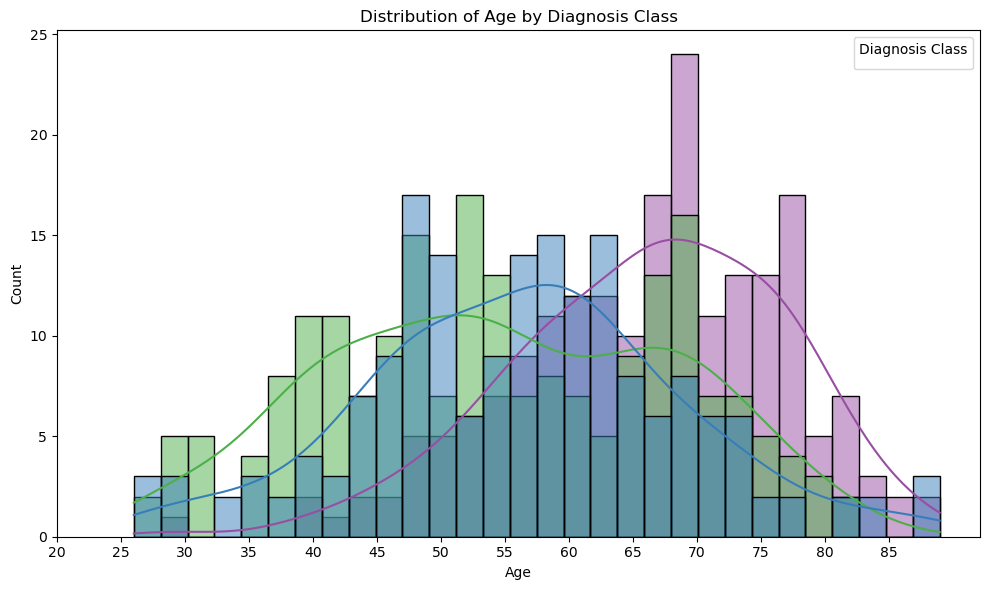

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import pandas as pd

# Ensure age is numeric
cancer_data['age'] = pd.to_numeric(cancer_data['age'], errors='coerce')

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(data=cancer_data, x='age', hue='diagnosis', bins=30, kde=True, palette="Set1", edgecolor="black")

plt.title("Distribution of Age by Diagnosis Class")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title='Diagnosis Class')

# Clean x-axis
plt.xticks(np.arange(20, 90, 5))

plt.tight_layout()
plt.show()


In [ ]:
# List of numeric features to analyze
numeric_features = ['age', 'plasma_CA19_9', 'creatinine', 'LYVE1', 'REG1B', 'TFF1', 'REG1A']

# Convert to numeric, forcing errors to NaN
for col in numeric_features:
    cancer_data[col] = pd.to_numeric(cancer_data[col], errors='coerce')

# Drop rows with missing values in numeric columns
clean_data = cancer_data[numeric_features].dropna()

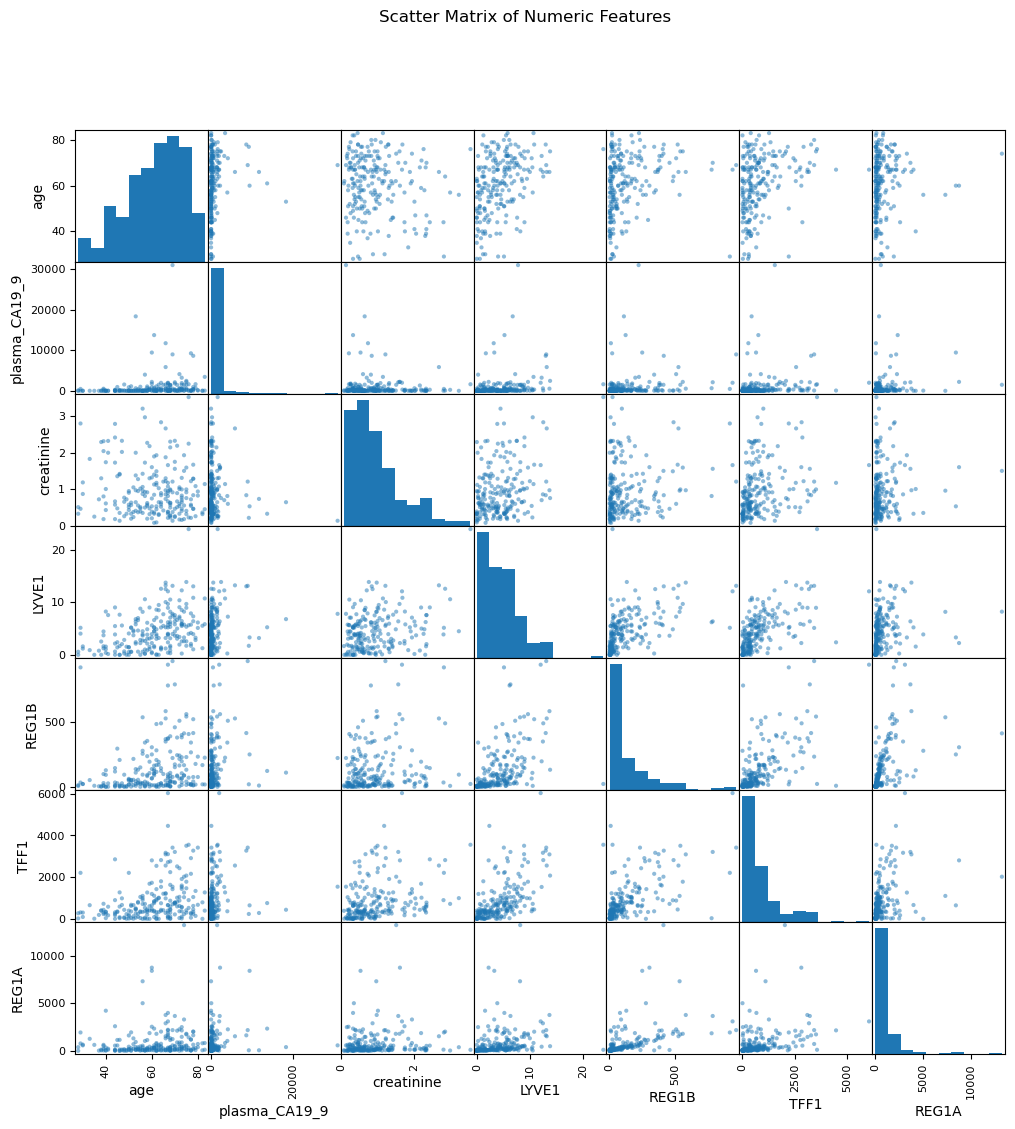

In [ ]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
#make scatter plot
scatter_matrix(clean_data, figsize=(12, 12))
plt.suptitle("Scatter Matrix of Numeric Features")
plt.show()

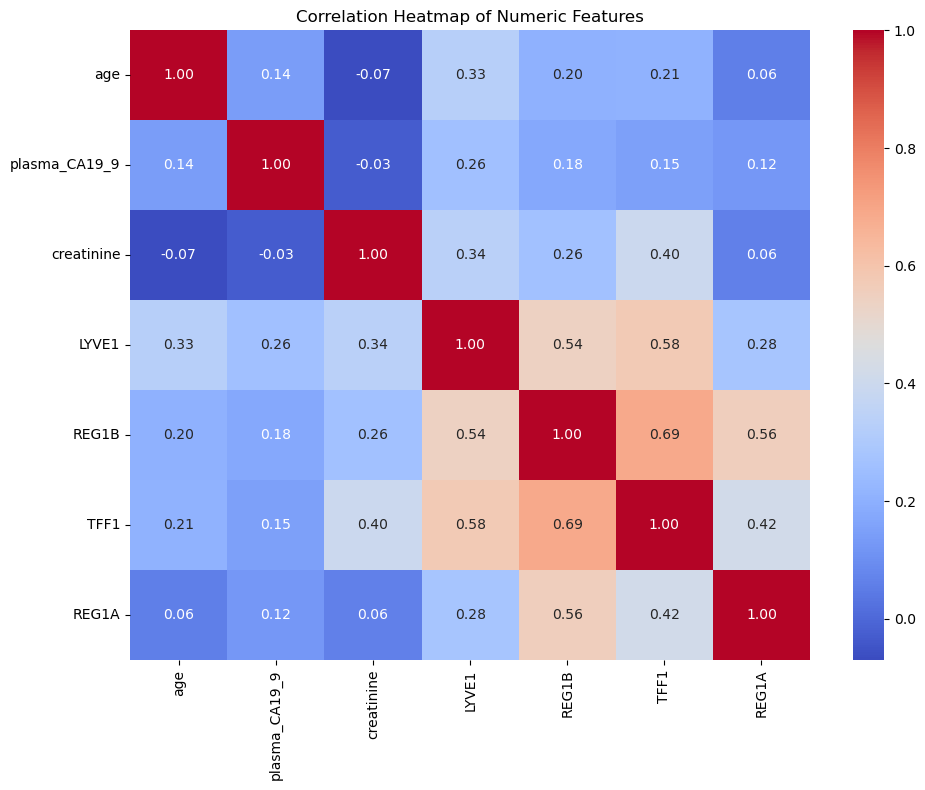

In [ ]:
# 6. Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(cancer_data[numeric_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Load the dataset correctly using the header row in the CSV
path = "../../Data/cancer/cancer.csv"
data = pd.read_csv(path)  # Removed names=...

# Drop unwanted columns
drop_cols = [
    "sample_id", "patient_cohort", "sample_origin", "age", "sex",
    "stage", "benign_sample_diagnosis", "plasma_CA19_9", "REG1A"
]
clean_data = data.drop(columns=drop_cols)

# Encode diagnosis as categorical codes: will become 0, 1, 2
clean_data["diagnosis"] = clean_data["diagnosis"].astype("category").cat.codes

# Show the cleaned data
print(clean_data.head(10))


   diagnosis  creatinine     LYVE1      REG1B        TFF1
0          0     1.83222  0.893219   52.94884  654.282174
1          0     0.97266  2.037585   94.46703  209.488250
2          0     0.78039  0.145589  102.36600  461.141000
3          0     0.70122  0.002805   60.57900  142.950000
4          0     0.21489  0.000860   65.54000   41.088000
5          0     0.84825  0.003393   62.12600   59.793000
6          0     0.62205  0.174381  152.27700  117.516000
7          0     0.89349  0.003574    3.73000   40.294000
8          0     0.48633  0.001945    7.02100   26.782000
9          0     0.61074  0.278778   83.92800   19.185000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import recall_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Encode diagnosis
clean_data["diagnosis"] = clean_data["diagnosis"].astype("category").cat.codes

# Define X and y
X = clean_data.drop("diagnosis", axis=1)
y = clean_data["diagnosis"]

# Binarize labels for ROC-AUC
y_binarized = label_binarize(y, classes=[0, 1, 2])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"),
    "SVM": SVC(probability=True),
    "kNN": KNeighborsClassifier()
}

# Evaluate models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)

    recall = recall_score(y_test, y_pred, average="macro")
    roc_auc = roc_auc_score(y_test_bin, y_proba, average="macro")

    print(f"{name}:")
    print(f"  Recall Score: {recall:.3f}")
    print(f"  ROC-AUC:      {roc_auc:.3f}\n")


Logistic Regression:
  Recall Score: 0.667
  ROC-AUC:      0.828

Random Forest:
  Recall Score: 0.686
  ROC-AUC:      0.826

XGBoost:
  Recall Score: 0.651
  ROC-AUC:      0.814

SVM:
  Recall Score: 0.620
  ROC-AUC:      0.804

kNN:
  Recall Score: 0.588
  ROC-AUC:      0.771



In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, roc_auc_score

# Load and clean data
file_path = "../../Data/cancer/cancer.csv"
names = ["sample_id", "patient_cohort", "sample_origin", "age", "sex", "diagnosis",
         "stage", "benign_sample_diagnosis", "plasma_CA19_9", "creatinine",
         "LYVE1", "REG1B", "TFF1", "REG1A"]
data = pd.read_csv(file_path, names=names, skiprows=1)

# Drop unneeded columns
drop_columns = ["sample_id", "patient_cohort", "sample_origin", "age", "sex",
                "stage", "benign_sample_diagnosis", "plasma_CA19_9", "REG1A"]
data = data.drop(columns=drop_columns)

# Encode diagnosis
data['diagnosis'] = data['diagnosis'].astype('category').cat.codes

# Drop missing values
data = data.dropna()

# Split features/target
X = data.drop("diagnosis", axis=1)
y = data["diagnosis"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Binarize for multiclass AUC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Define models
models = {
    "Logistic Regression": LogisticRegression(class_weight="balanced", solver="liblinear"),
    "Random Forest": RandomForestClassifier(class_weight="balanced", random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", n_estimators=50),
    "SVM": SVC(probability=True, class_weight="balanced", random_state=42),
    "kNN": KNeighborsClassifier()
}

# Train, evaluate, and collect results
results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled) if hasattr(model, "predict_proba") else None

    if y_proba is not None:
        roc_auc = roc_auc_score(y_test_bin, y_proba, average="macro", multi_class="ovr")
    else:
        roc_auc = float("nan")

    recall = recall_score(y_test, y_pred, average="macro")
    results.append({"Model": name, "ROC-AUC": roc_auc, "Recall": recall})

# Output performance
results_df = pd.DataFrame(results)
print(results_df)


c:\Users\aws_1\anaconda.python.official\envs\shap_env\lib\site-packages\sklearn\linear_model\_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\Users\aws_1\anaconda.python.official\envs\shap_env\lib\site-packages\xgboost\training.py:183: UserWarning: [20:58:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                 Model   ROC-AUC    Recall
0  Logistic Regression  0.818800  0.628126
1        Random Forest  0.829505  0.651857
2              XGBoost  0.820868  0.659245
3                  SVM  0.806132  0.611866
4                  kNN  0.770890  0.587558


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import label_binarize
import numpy as np

# Create custom scorer for ROC-AUC (multiclass)
def multiclass_roc_auc_score(model, X, y):
    try:
        y_score = model.predict_proba(X)
        y_bin = label_binarize(y, classes=[0, 1, 2])
        return roc_auc_score(y_bin, y_score, average="macro", multi_class="ovr")
    except:
        return np.nan

# Set up 5-fold stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Scale entire dataset (no train/test split here)
X_scaled = scaler.fit_transform(X)

# Cross-validation evaluation
results = []
for name, model in models.items():
    recall = cross_val_score(model, X_scaled, y, scoring=make_scorer(recall_score, average='macro'), cv=cv)
    
    roc_auc_scores = []
    for train_idx, test_idx in cv.split(X_scaled, y):
        X_train_fold, X_test_fold = X_scaled[train_idx], X_scaled[test_idx]
        y_train_fold, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train_fold, y_train_fold)
        try:
            y_score = model.predict_proba(X_test_fold)
            y_test_bin = label_binarize(y_test_fold, classes=[0, 1, 2])
            score = roc_auc_score(y_test_bin, y_score, average='macro', multi_class='ovr')
        except:
            score = np.nan
        roc_auc_scores.append(score)

    results.append({
        "Model": name,
        "Recall (Mean)": np.mean(recall),
        "Recall (Std)": np.std(recall),
        "ROC-AUC (Mean)": np.nanmean(roc_auc_scores),
        "ROC-AUC (Std)": np.nanstd(roc_auc_scores)
    })

# Show as DataFrame
cv_df = pd.DataFrame(results)
print(cv_df)


                 Model  Recall (Mean)  Recall (Std)  ROC-AUC (Mean)  \
0  Logistic Regression       0.582748      0.031295        0.768273   
1        Random Forest       0.615133      0.029209        0.802765   
2              XGBoost       0.601591      0.031658        0.783730   
3                  SVM       0.569263      0.032921        0.759038   
4                  kNN       0.598888      0.039817        0.769866   

   ROC-AUC (Std)  
0       0.026604  
1       0.021807  
2       0.022003  
3       0.022655  
4       0.029117  


In [ ]:
import numpy as np
from sklearn.metrics import recall_score, roc_auc_score
from sklearn.preprocessing import label_binarize

print("\n--- Evaluation with Threshold = 0.4 ---\n")

# Binarize y_test for ROC-AUC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
threshold = 0.4

for name, model in models.items():
    if not hasattr(model, "predict_proba"):
        print(f"{name} skipped (no predict_proba support)\n")
        continue

    # Predict probabilities
    y_proba = model.predict_proba(X_test_scaled)

    # Predict classes based on threshold
    y_pred_thresh = [np.argmax(probs) if max(probs) >= threshold else np.argmax(probs) for probs in y_proba]

    # Compute metrics
    recall = recall_score(y_test, y_pred_thresh, average="macro")
    roc_auc = roc_auc_score(y_test_bin, y_proba, average="macro", multi_class="ovr")

    print(f"{name}:")
    print(f"  Recall (Threshold 0.4): {recall:.3f}")
    print(f"  ROC-AUC:               {roc_auc:.3f}\n")



--- Evaluation with Threshold = 0.4 ---

Logistic Regression:
  Recall (Threshold 0.4): 0.644
  ROC-AUC:               0.834

Random Forest:
  Recall (Threshold 0.4): 0.771
  ROC-AUC:               0.919

XGBoost:
  Recall (Threshold 0.4): 0.820
  ROC-AUC:               0.929

SVM:
  Recall (Threshold 0.4): 0.617
  ROC-AUC:               0.852

kNN:
  Recall (Threshold 0.4): 0.656
  ROC-AUC:               0.849



In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, recall_score, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np
import pandas as pd

# Custom scorer for multiclass ROC-AUC
def multiclass_roc_auc_score(estimator, X, y):
    try:
        y_score = estimator.predict_proba(X)
        y_bin = label_binarize(y, classes=[0, 1, 2])
        return roc_auc_score(y_bin, y_score, average="macro", multi_class="ovr")
    except:
        return np.nan

# Scoring dictionary
scoring = {
    'Recall': make_scorer(recall_score, average='macro'),
    'ROC-AUC': make_scorer(multiclass_roc_auc_score, greater_is_better=True)
}

# 5-fold Stratified Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Run CV for each model
cv_results = []

for name, model in models.items():
    recall_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv,
                                    scoring=scoring['Recall'])
    roc_auc_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv,
                                     scoring=scoring['ROC-AUC'])
    
    cv_results.append({
        "Model": name,
        "Recall (Mean)": np.mean(recall_scores),
        "Recall (Std)": np.std(recall_scores),
        "ROC-AUC (Mean)": np.nanmean(roc_auc_scores),
        "ROC-AUC (Std)": np.nanstd(roc_auc_scores)
    })

# Display as DataFrame
cv_df = pd.DataFrame(cv_results)
print(cv_df)


                 Model  Recall (Mean)  Recall (Std)  ROC-AUC (Mean)  \
0  Logistic Regression       0.558917      0.048651             NaN   
1        Random Forest       0.602241      0.058634             NaN   
2              XGBoost       0.572903      0.046362             NaN   
3                  SVM       0.581432      0.015565             NaN   
4                  kNN       0.559022      0.053292             NaN   

   ROC-AUC (Std)  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  


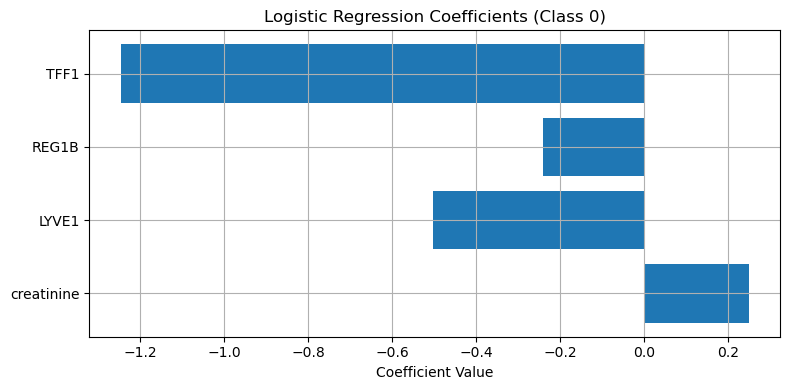

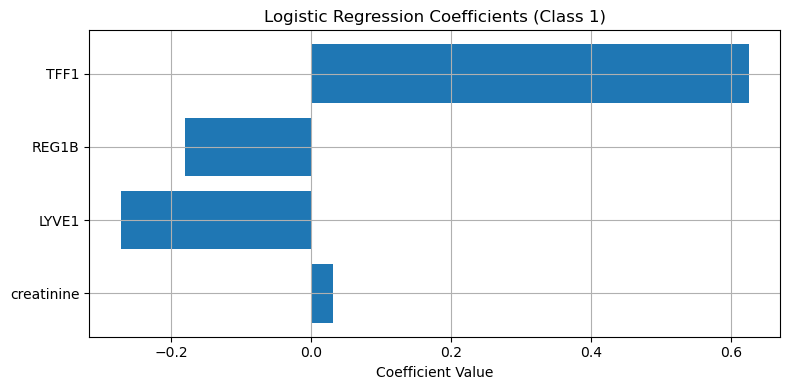

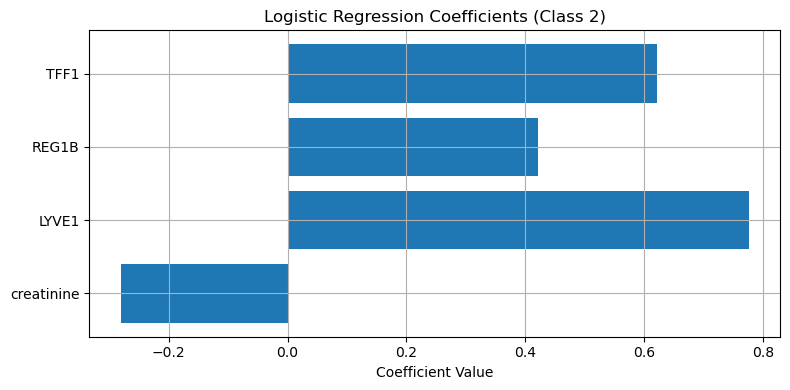

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature names and coefficients
coef = models["Logistic Regression"].coef_
features = X.columns

# Plot coefficients for each class
for i, class_coef in enumerate(coef):
    plt.figure(figsize=(8, 4))
    plt.barh(features, class_coef)
    plt.title(f'Logistic Regression Coefficients (Class {i})')
    plt.xlabel('Coefficient Value')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [15]:
import shap

# Example for tree-based models (e.g., XGBoost)
model = models["Random Forest"]
model.fit(X_train_scaled, y_train)
explainer = shap.Explainer(model)
shap_values = explainer(X_test_scaled)

shap.summary_plot(shap_values[1], X_test_scaled)

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [19]:
print(type(shap_values))
print(len(shap_values))
print(shap_values[0].shape)
print(X_test_scaled.shape)

<class 'shap._explanation.Explanation'>
118
(4, 3)
(118, 4)
